In [2]:
#SybrSAfe

#remeber! concentration is in ng/ml!!!

#4/05/17
blank = [7.646, 7.900, 7.307, 7.816]

fluorometry_measurement_standard= {
"concentration [ng/ul]": [32000, 16000, 8000, 4000, 2000, 1000, 500, 250, 25, 2.5, 0.25, 0.025, 0.00],
"fluorescence [RFU]" : [80.253, 72.295, 52.659, 35.334, 21.789, 14.813, 10.962, 8.683, 7.251, 7.251, 7.618, 7.647, average(blank2)]
}


NameError: name 'average' is not defined

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def average(number):
    return float(sum(number))/len(number)

def _createPredict(fluorometry_measurement_standard):
    x = fluorometry_measurement_standard["concentration [ng/ul]"]
    y = fluorometry_measurement_standard["fluorescence [RFU]"]
    p = np.polyfit(x, y, 2)    
    return np.poly1d(p)
   
predict = _createPredict(fluorometry_measurement_standard)

def plot(fluorometry_measurement_standard):
    predict = _createPredict(fluorometry_measurement_standard)
    x = fluorometry_measurement_standard["concentration [ng/ul]"]
    y = fluorometry_measurement_standard["fluorescence [RFU]"]
    px = np.arange(min(x), max(x)+1, 1)
    py = [predict(xx) for xx in px]
   # plt.axis([0, 40, 0, 50])
    
    plt.plot(x, y, 'ro')
    plt.plot(px, py)
    plt.show()
    
sd_blank = np.std(blank)
average_blank = average(blank)
detection_limit = average_blank + 3*sd_blank

#lod is limit of detection
def lod(blank):
    sd_blank = np.std(blank)
    average_blank = average(blank)
    detection_limit = average_blank + 3*sd_blank
    print(sd_blank, average_blank, detection_limit )


In [7]:
lod(blank)

0.2272282717885254 7.66725 8.348934815365576


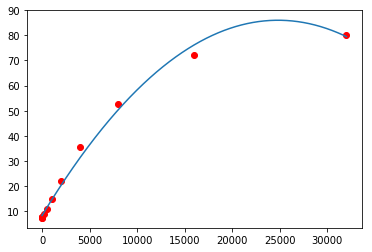

In [8]:
plot(fluorometry_measurement_standard)

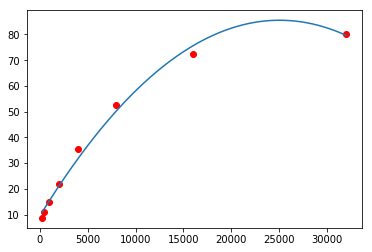

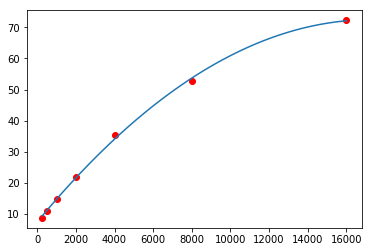

In [10]:
#I need to delete 5 last points because are above detection limit


fluorometry_measurement_standard_minus_5_points= {
"concentration [ng/ul]": [32000, 16000, 8000, 4000, 2000, 1000, 500, 250],
"fluorescence [RFU]" : [80.253, 72.295, 52.659, 35.334, 21.789, 14.813, 10.962, 8.683]
}

plot(fluorometry_measurement_standard_minus_5_points)

fluorometry_measurement_standard_minus_5_points1= {
"concentration [ng/ul]": [16000, 8000, 4000, 2000, 1000, 500, 250],
"fluorescence [RFU]" : [72.295, 52.659, 35.334, 21.789, 14.813, 10.962, 8.683]
}

plot(fluorometry_measurement_standard_minus_5_points1)

In [1]:
#range of detection is from 250 ng/ml to 32000ng/ml

In [2]:
%run ../../functions.ipynb

name = "SybrSafe"
control = [{"name": "dsDNA",
        "fluorescences": [32.919, 32.617, 33.649]}]
        
data = [{"name": "dsDNA + RNA",
        "fluorescences": [36.691, 39.663, 37.690]},
        {"name": "dsDNA + ssDNA",
        "fluorescences": [28.692, 32.205, 31.565]},
        {"name": "dsDNA + protein",
        "fluorescences": [29.192, 29.888, 25.535]}]

results = specificity_assay(control, data, name)
results
control

[{'average': 33.06166666666667,
  'cv': 0.013103438746895445,
  'fluorescences': [32.919, 32.617, 33.649],
  'name': 'dsDNA',
  'standard_deviation': 0.4332215240369416}]

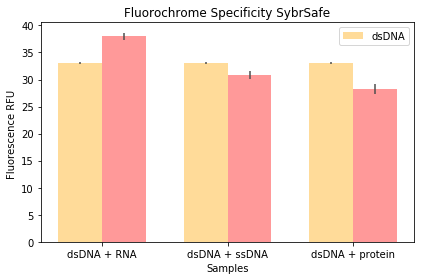

In [7]:
double_bar_graph((np.repeat(control[0]["average"], 3)),
                 results["average"],
                 results["name"],
                 sd_1=(np.repeat(control[0]["standard_deviation"], 3)),
                 sd_2=results["standard_deviation"].values,
                 xlabel="Samples", ylabel="Fluorescence RFU ", title=("Fluorochrome Specificity "+ str(name)),
                legend_1="dsDNA", legend_2="", colour1="orange" )

In [9]:
sybrsafe_specificity = np.array(results["specificity"])
sybrsafe_specificity_average = average(np.array(results["specificity"]))
sybrsafe_specificity

array([85.01890407, 93.22175732, 85.31027877])

In [10]:
sybrsafe_specificity_average

87.85031338744098

In [11]:
sybrsafe_specificity_average = 87.85031338744098
sybrsafe_specificity = [85.01890407, 93.22175732, 85.31027877]

In [13]:
blank = [7.646, 7.900, 7.307, 7.816]
lod(blank)

blank standard deviation: 0.2272282717885254
blank average: 7.66725
detection limit: 8.348934815365576


(0.2272282717885254, 7.66725, 8.348934815365576)

In [1]:
control

NameError: name 'control' is not defined